# Cargar los datos para la tarea de clasificación

In [101]:
import pandas as pd
iris = pd.read_csv("D:/No tocar/Lic. Ciencias de la Computacion/Cuarto Semestre/Practica Laboral IA/CODE/iris.csv")

# Análisis de los datos descargados

In [ ]:
iris.describe()

## Visualización

Graficamos todas las características dos a dos para buscar la mejor división de los datos

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

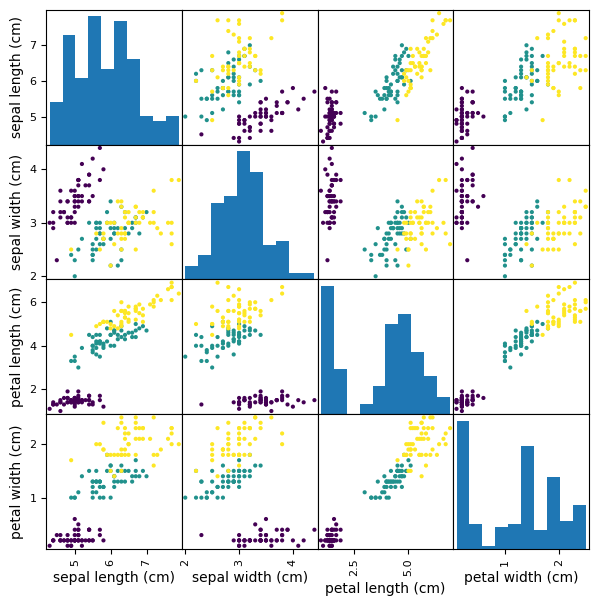

In [92]:
%matplotlib inline
from calendar import c
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(iris[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]],
                           figsize=(7,7),c=iris['target'],alpha=1)

Las características más prometedoras son las dos últimas,  
que observamos más detenidamente ahora

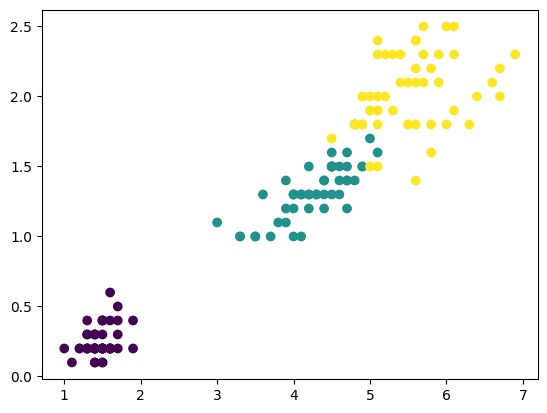

In [93]:
plt.scatter(iris['petal length (cm)'],iris['petal width (cm)'],c=iris['target'])
plt.show()

# División de los datos

A continuación dividimos el conjunto en entrenaimento, validación y prueba, de manera tal  
que no se pierda la proporción de clases que existe(1:1:1)

In [ ]:
df = iris.drop(["sepal length (cm)", "sepal width (cm)","target_name"],axis=1) #Prepara el data set con las mejores 
                                                                                #características para su posterior división,
                                                                                #quitando las restantes.

Dividiendo el data set de manera que se conserve la relación existente entre las cantidades de cada clase en la columna  
target del data set.

In [102]:

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df["target"]):
 strat_train_set = df.loc[train_index]
 strat_test_set = df.loc[test_index]


In [ ]:
X_train = strat_train_set[["petal length (cm)", "petal width (cm)"]]# Separamos las características de las clases
Y_train = strat_train_set['target']                                 # para los conjuntos de entrenamiento, validación
X_test = strat_test_set[["petal length (cm)", "petal width (cm)"]]  # y prueba.
Y_test = strat_test_set['target']

## Duplicando los datos de entrenamiento

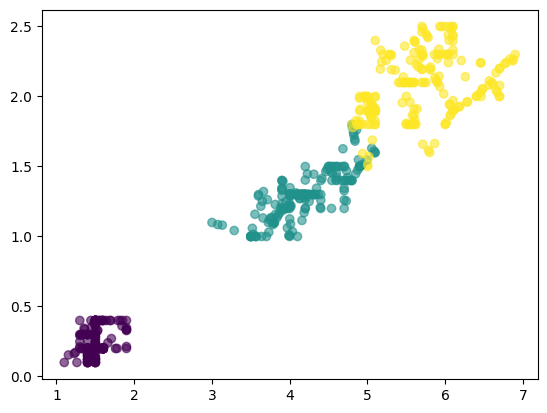

In [103]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = {0:200,1:200,2:200},random_state = 42)
X_resample, Y_resample = smote.fit_resample(X_train, Y_train)
plt.scatter(X_resample['petal length (cm)'],X_resample['petal width (cm)'],c=Y_resample,alpha=0.6)

In [104]:
X_train = pd.concat([X_train,X_resample],ignore_index=True)
Y_train = pd.concat([Y_train,Y_resample],ignore_index=True)

# Entrenando los modelos de K-Neighbors Classifier y Decision Tree Classifier

## K-Neighbors Classifier

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf = knn_clf.fit(X_train,Y_train)

In [123]:
from sklearn.metrics import precision_score, recall_score,confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_knn_pred = cross_val_predict(knn_clf, X_train, Y_train, cv=3)
precision_score = precision_score(Y_train, y_train_knn_pred, average=None)
recall_score = recall_score(Y_train,y_train_knn_pred,average=None)
print(f"{precision_score} \n {recall_score}")
confusion_matrix(Y_train, y_train_knn_pred)


[1.         0.97058824 0.98275862] 
 [1.         0.98297872 0.97021277]


array([[235,   0,   0],
       [  0, 231,   4],
       [  0,   7, 228]], dtype=int64)

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,y_train_knn_pred)

0.9843971631205674

## Decision Tree Classifier

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict

tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf = tree_clf.fit(X_train,Y_train)

5

In [132]:

from sklearn.metrics import precision_score, recall_score
y_train_tree_pred = cross_val_predict(tree_clf, X_train, Y_train, cv=3)
precision_score = precision_score(Y_train, y_train_tree_pred, average=None)
recall_score = recall_score(Y_train,y_train_tree_pred,average=None)
print(f"{precision_score} \n {recall_score}")

[1.         0.97881356 0.98290598] 
 [1.         0.98297872 0.9787234 ]


In [133]:
accuracy_score(Y_train,y_train_tree_pred)

0.9872340425531915

# Evaluando los modelos en el cojunto de prueba

## K-Neighbors Classifier

In [125]:
from sklearn.metrics import precision_score, recall_score
y_test_knn_pred = cross_val_predict(knn_clf, X_test, Y_test, cv=3)
precision_score = precision_score(Y_test, y_test_knn_pred, average=None)
recall_score = recall_score(Y_test,y_test_knn_pred,average=None)
print(f"{precision_score} \n {recall_score}")

[1.         0.875      0.92857143] 
 [1.         0.93333333 0.86666667]


## Decision Tree Classifier

In [134]:
from sklearn.metrics import precision_score, recall_score
y_test_tree_pred = cross_val_predict(tree_clf, X_test, Y_test, cv=3)
precision_score_tree = precision_score(Y_test, y_test_tree_pred, average=None)
recall_score_tree = recall_score(Y_test,y_test_tree_pred,average=None)
print(f"{precision_score_tree} \n {recall_score_tree}")

[1.         0.875      0.92857143] 
 [1.         0.93333333 0.86666667]
